In [40]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [42]:
train = pd.read_csv('./data/train.csv', index_col='id')

In [43]:
unique_labels = train['type'].unique()
label_dict = {val: i for i, val in enumerate(unique_labels)}
i2lb = {v:k for k, v in label_dict.items()}
labels = train['type']

In [44]:
# scaler = StandardScaler()
trainDrop = train.drop(columns=['type'])
# trainDrop['type'] = train['type'].replace(label_dict)

# _mat = scaler.fit_transform(trainDrop)
# trainDrop = pd.DataFrame(_mat, columns=trainDrop.columns, index=trainDrop.index)
trainDrop['type'] = labels.replace(label_dict)

In [45]:
trainDrop.head()
# train.head()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type
id,,,,,,,,,,,,,,,,,,,,,
0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,0
1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,0
2,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,0
3,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,0
4,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,1


In [46]:
trainDrop.corr()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type
fiberID,1.000000,0.002673,0.003424,0.001901,0.004731,0.004108,0.002785,0.000951,0.004014,0.004143,...,0.003111,0.002913,0.004261,0.001998,0.002441,0.003299,0.003050,0.005851,0.004217,-0.193218
psfMag_u,0.002673,1.000000,0.007163,0.008022,0.008373,0.007613,0.999612,0.001737,0.005493,0.007417,...,0.006210,0.007035,0.005979,0.006911,0.005475,0.005218,0.006855,0.006553,0.009054,0.002471
psfMag_g,0.003424,0.007163,1.000000,0.656575,0.675570,0.529464,0.018975,0.147544,0.246507,0.479143,...,0.611664,0.139764,0.489554,0.458087,0.211310,0.485867,0.637270,0.424497,0.624421,-0.006875
psfMag_r,0.001901,0.008022,0.656575,1.000000,0.537715,0.451904,0.013608,0.120586,0.350773,0.498966,...,0.535407,0.487657,0.449181,0.677228,0.450860,0.550238,0.516004,0.590266,0.538881,-0.006043
psfMag_i,0.004731,0.008373,0.675570,0.537715,1.000000,0.648709,0.018252,0.134389,0.352580,0.505415,...,0.682430,0.471127,0.523036,0.363586,0.557699,0.452765,0.523340,0.581413,0.640439,-0.008130
psfMag_z,0.004108,0.007613,0.529464,0.451904,0.648709,1.000000,0.018465,0.121613,0.302411,0.557741,...,0.586643,0.552653,0.657507,0.419934,0.311835,0.448141,0.347738,0.658930,0.628597,-0.005532
fiberMag_u,0.002785,0.999612,0.018975,0.013608,0.018252,0.018465,1.000000,0.003690,0.002805,0.016168,...,0.017214,0.012957,0.015468,0.007720,0.013842,0.014747,0.020647,0.007937,0.018597,0.002383
fiberMag_g,0.000951,0.001737,0.147544,0.120586,0.134389,0.121613,0.003690,1.000000,0.063919,0.119069,...,0.109501,0.066799,0.109731,0.099121,0.101207,0.112340,0.090383,0.099054,0.139623,-0.001263
fiberMag_r,0.004014,0.005493,0.246507,0.350773,0.352580,0.302411,0.002805,0.063919,1.000000,0.492312,...,0.426770,0.171021,0.225000,0.012828,0.333907,0.411668,0.273085,0.485412,0.330141,-0.006247
fiberMag_i,0.004143,0.007417,0.479143,0.498966,0.505415,0.557741,0.016168,0.119069,0.492312,1.000000,...,0.552945,0.438867,0.521864,0.124149,0.435159,0.469454,0.585379,0.432930,0.604043,-0.008025


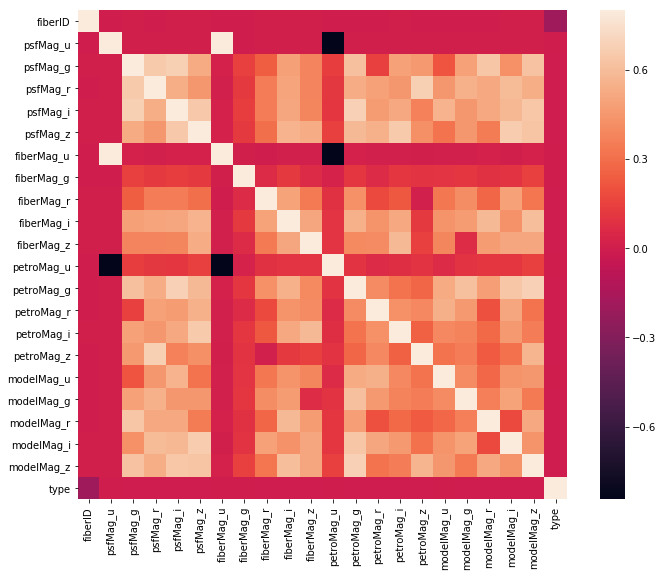

In [47]:
corrmat = trainDrop.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [49]:
columnList = train.columns
target_var = ['type']
input_var = list(filter(lambda x:x != 'type', columnList))

In [50]:
trainDrop

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type
id,,,,,,,,,,,,,,,,,,,,,
0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,0
1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,0
2,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,0
3,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,0
4,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,1
5,76,19.781358,19.315942,19.431752,19.600843,19.674611,20.167919,19.661686,19.785276,19.928729,...,19.390363,19.552879,19.688197,19.799425,19.899462,19.325313,19.469356,19.598653,19.677858,2
6,696,22.227121,21.120919,20.715289,20.575474,20.214773,22.765383,21.275343,21.006494,20.901228,...,21.039226,20.721977,20.576279,19.699959,22.081704,21.063189,20.726611,20.578269,20.657361,0
7,14,17.024278,15.786268,15.524910,15.500176,15.527453,17.336320,16.063400,15.889851,15.834744,...,15.804802,15.625482,15.569017,15.593497,17.037058,15.747645,15.556542,15.500731,15.498295,3
8,384,20.793464,20.773064,20.607211,20.362645,20.256067,21.183702,21.089308,20.956964,20.535572,...,20.756746,20.721068,20.344337,20.028693,20.945573,20.709594,20.577917,20.307847,20.459722,0


In [51]:
X_train = trainDrop[input_var]
y_train = trainDrop[target_var]

In [52]:
X_train.shape

(199991, 21)

In [53]:
y_train.shape

(199991, 1)

In [54]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
predict = rfc.predict(X_train)

In [56]:
predict

array([0, 0, 0, ..., 1, 6, 0], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score

result = accuracy_score(y_train, predict)
print('정확도 : ', result)

정확도 :  0.9923646564095384


In [59]:
predict

array([0, 0, 0, ..., 1, 6, 0], dtype=int64)

In [60]:
test = pd.read_csv('./data/test.csv').reset_index(drop=True)
test_ids = test['id']
test = test.drop(columns=['id'])
# test = pd.DataFrame(scaler.transform(test), columns=test.columns, index = test.index)

In [61]:
predTest = rfc.predict(test)
predTest

array([1, 0, 6, ..., 0, 0, 7], dtype=int64)

In [62]:
testRes = list(map(lambda x:i2lb[x], predTest) )
testRes

['STAR_RED_DWARF',
 'QSO',
 'GALAXY',
 'SERENDIPITY_BLUE',
 'STAR_RED_DWARF',
 'REDDEN_STD',
 'SERENDIPITY_BLUE',
 'SPECTROPHOTO_STD',
 'GALAXY',
 'QSO',
 'STAR_CATY_VAR',
 'GALAXY',
 'QSO',
 'QSO',
 'GALAXY',
 'STAR_RED_DWARF',
 'GALAXY',
 'GALAXY',
 'STAR_BHB',
 'SPECTROPHOTO_STD',
 'SPECTROPHOTO_STD',
 'SERENDIPITY_BLUE',
 'SERENDIPITY_BLUE',
 'SERENDIPITY_FIRST',
 'REDDEN_STD',
 'STAR_SUB_DWARF',
 'SERENDIPITY_BLUE',
 'STAR_CARBON',
 'STAR_RED_DWARF',
 'SERENDIPITY_BLUE',
 'QSO',
 'SERENDIPITY_BLUE',
 'GALAXY',
 'QSO',
 'GALAXY',
 'QSO',
 'GALAXY',
 'QSO',
 'QSO',
 'GALAXY',
 'SPECTROPHOTO_STD',
 'QSO',
 'QSO',
 'QSO',
 'STAR_CATY_VAR',
 'STAR_RED_DWARF',
 'REDDEN_STD',
 'STAR_RED_DWARF',
 'SERENDIPITY_DISTANT',
 'GALAXY',
 'QSO',
 'GALAXY',
 'STAR_CARBON',
 'REDDEN_STD',
 'REDDEN_STD',
 'QSO',
 'QSO',
 'GALAXY',
 'SPECTROPHOTO_STD',
 'QSO',
 'SPECTROPHOTO_STD',
 'SERENDIPITY_DISTANT',
 'SERENDIPITY_FIRST',
 'GALAXY',
 'GALAXY',
 'STAR_CATY_VAR',
 'STAR_RED_DWARF',
 'STAR_BHB',
 'S

In [63]:
sample = pd.read_csv('data/sample_submission.csv')
submission = pd.DataFrame(testRes, index=test.index)

sample
# submission
# submission = submission.rename(columns=i2lb)
# submission
# submission = pd.concat([test_ids, submission], axis=1)
# submission
# submission = submission[sample.columns]
# submission
# submission.to_csv("submission.csv", index=False)

,id,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
0,199991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,199992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,199993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,199994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,199996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,199997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,199998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,199999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
submission

,0
0,STAR_RED_DWARF
1,QSO
2,GALAXY
3,SERENDIPITY_BLUE
4,STAR_RED_DWARF
5,REDDEN_STD
6,SERENDIPITY_BLUE
7,SPECTROPHOTO_STD
8,GALAXY
9,QSO


In [65]:
onehot = pd.get_dummies(submission[0]) 

In [66]:
onehot['id'] = sample['id']
onehot

,GALAXY,QSO,REDDEN_STD,ROSAT_D,SERENDIPITY_BLUE,SERENDIPITY_DISTANT,SERENDIPITY_FIRST,SERENDIPITY_RED,SKY,SPECTROPHOTO_STD,STAR_BHB,STAR_BROWN_DWARF,STAR_CARBON,STAR_CATY_VAR,STAR_RED_DWARF,STAR_SUB_DWARF,STAR_WHITE_DWARF,id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,199991
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199992
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199993
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,199994
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,199995
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199996
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,199997
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,199998
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199999
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200000


In [67]:
resCols = list(onehot.columns)
resCols

['GALAXY',
 'QSO',
 'REDDEN_STD',
 'ROSAT_D',
 'SERENDIPITY_BLUE',
 'SERENDIPITY_DISTANT',
 'SERENDIPITY_FIRST',
 'SERENDIPITY_RED',
 'SKY',
 'SPECTROPHOTO_STD',
 'STAR_BHB',
 'STAR_BROWN_DWARF',
 'STAR_CARBON',
 'STAR_CATY_VAR',
 'STAR_RED_DWARF',
 'STAR_SUB_DWARF',
 'STAR_WHITE_DWARF',
 'id']

In [68]:
sample.columns

Index(['id', 'STAR_WHITE_DWARF', 'STAR_CATY_VAR', 'STAR_BROWN_DWARF',
       'SERENDIPITY_RED', 'REDDEN_STD', 'STAR_BHB', 'GALAXY',
       'SERENDIPITY_DISTANT', 'QSO', 'SKY', 'STAR_RED_DWARF', 'ROSAT_D',
       'STAR_PN', 'SERENDIPITY_FIRST', 'STAR_CARBON', 'SPECTROPHOTO_STD',
       'STAR_SUB_DWARF', 'SERENDIPITY_MANUAL', 'SERENDIPITY_BLUE'],
      dtype='object')

In [69]:
for col in resCols:
    sample[col] = onehot[col]

In [70]:
# https://data-newbie.tistory.com/20
sample.to_csv("submission.csv", index=False)

In [71]:
sample

,id,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
0,199991,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,0.0,0
1,199992,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0.0,0
2,199993,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0
3,199994,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,1
4,199995,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,0.0,0
5,199996,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0
6,199997,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,1
7,199998,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0.0,0
8,199999,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0
9,200000,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0.0,0
